In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing datasets. we have three datasets, let's import the training and test datasets. 
train_df = pd.read_csv("/Users/mahimashrestha/Downloads/playground-series-s5e2/train.csv")
train_extra = pd.read_csv("/Users/mahimashrestha/Downloads/playground-series-s5e2/training_extra.csv")
test = pd.read_csv("/Users/mahimashrestha/Downloads/playground-series-s5e2/test.csv")

In [3]:
# creating one training dataset by merging the two training data sets
train = pd.concat([train_df,train_extra],ignore_index=True)

In [4]:
train.head(5)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:
#first step is always understanding the dataset. 
#lets explore our dataset
train.shape

(3994318, 11)

In [6]:
#after we learn the number of rows and columns, we want to learn about the statistics
train.describe()

,id,Compartments,Weight Capacity (kg),Price
count,3.994318e+06,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,5.434740e+00,1.801042e+01,8.136217e+01
std,1.178058e+06,2.893043e+00,6.973969e+00,3.893868e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,3.000000e+00,1.206896e+01,4.747002e+01
50%,2.197158e+06,5.000000e+00,1.805436e+01,8.098495e+01
75%,3.195738e+06,8.000000e+00,2.398751e+01,1.148550e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [7]:
#now we work with missing valeus
train.isnull().sum()

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64

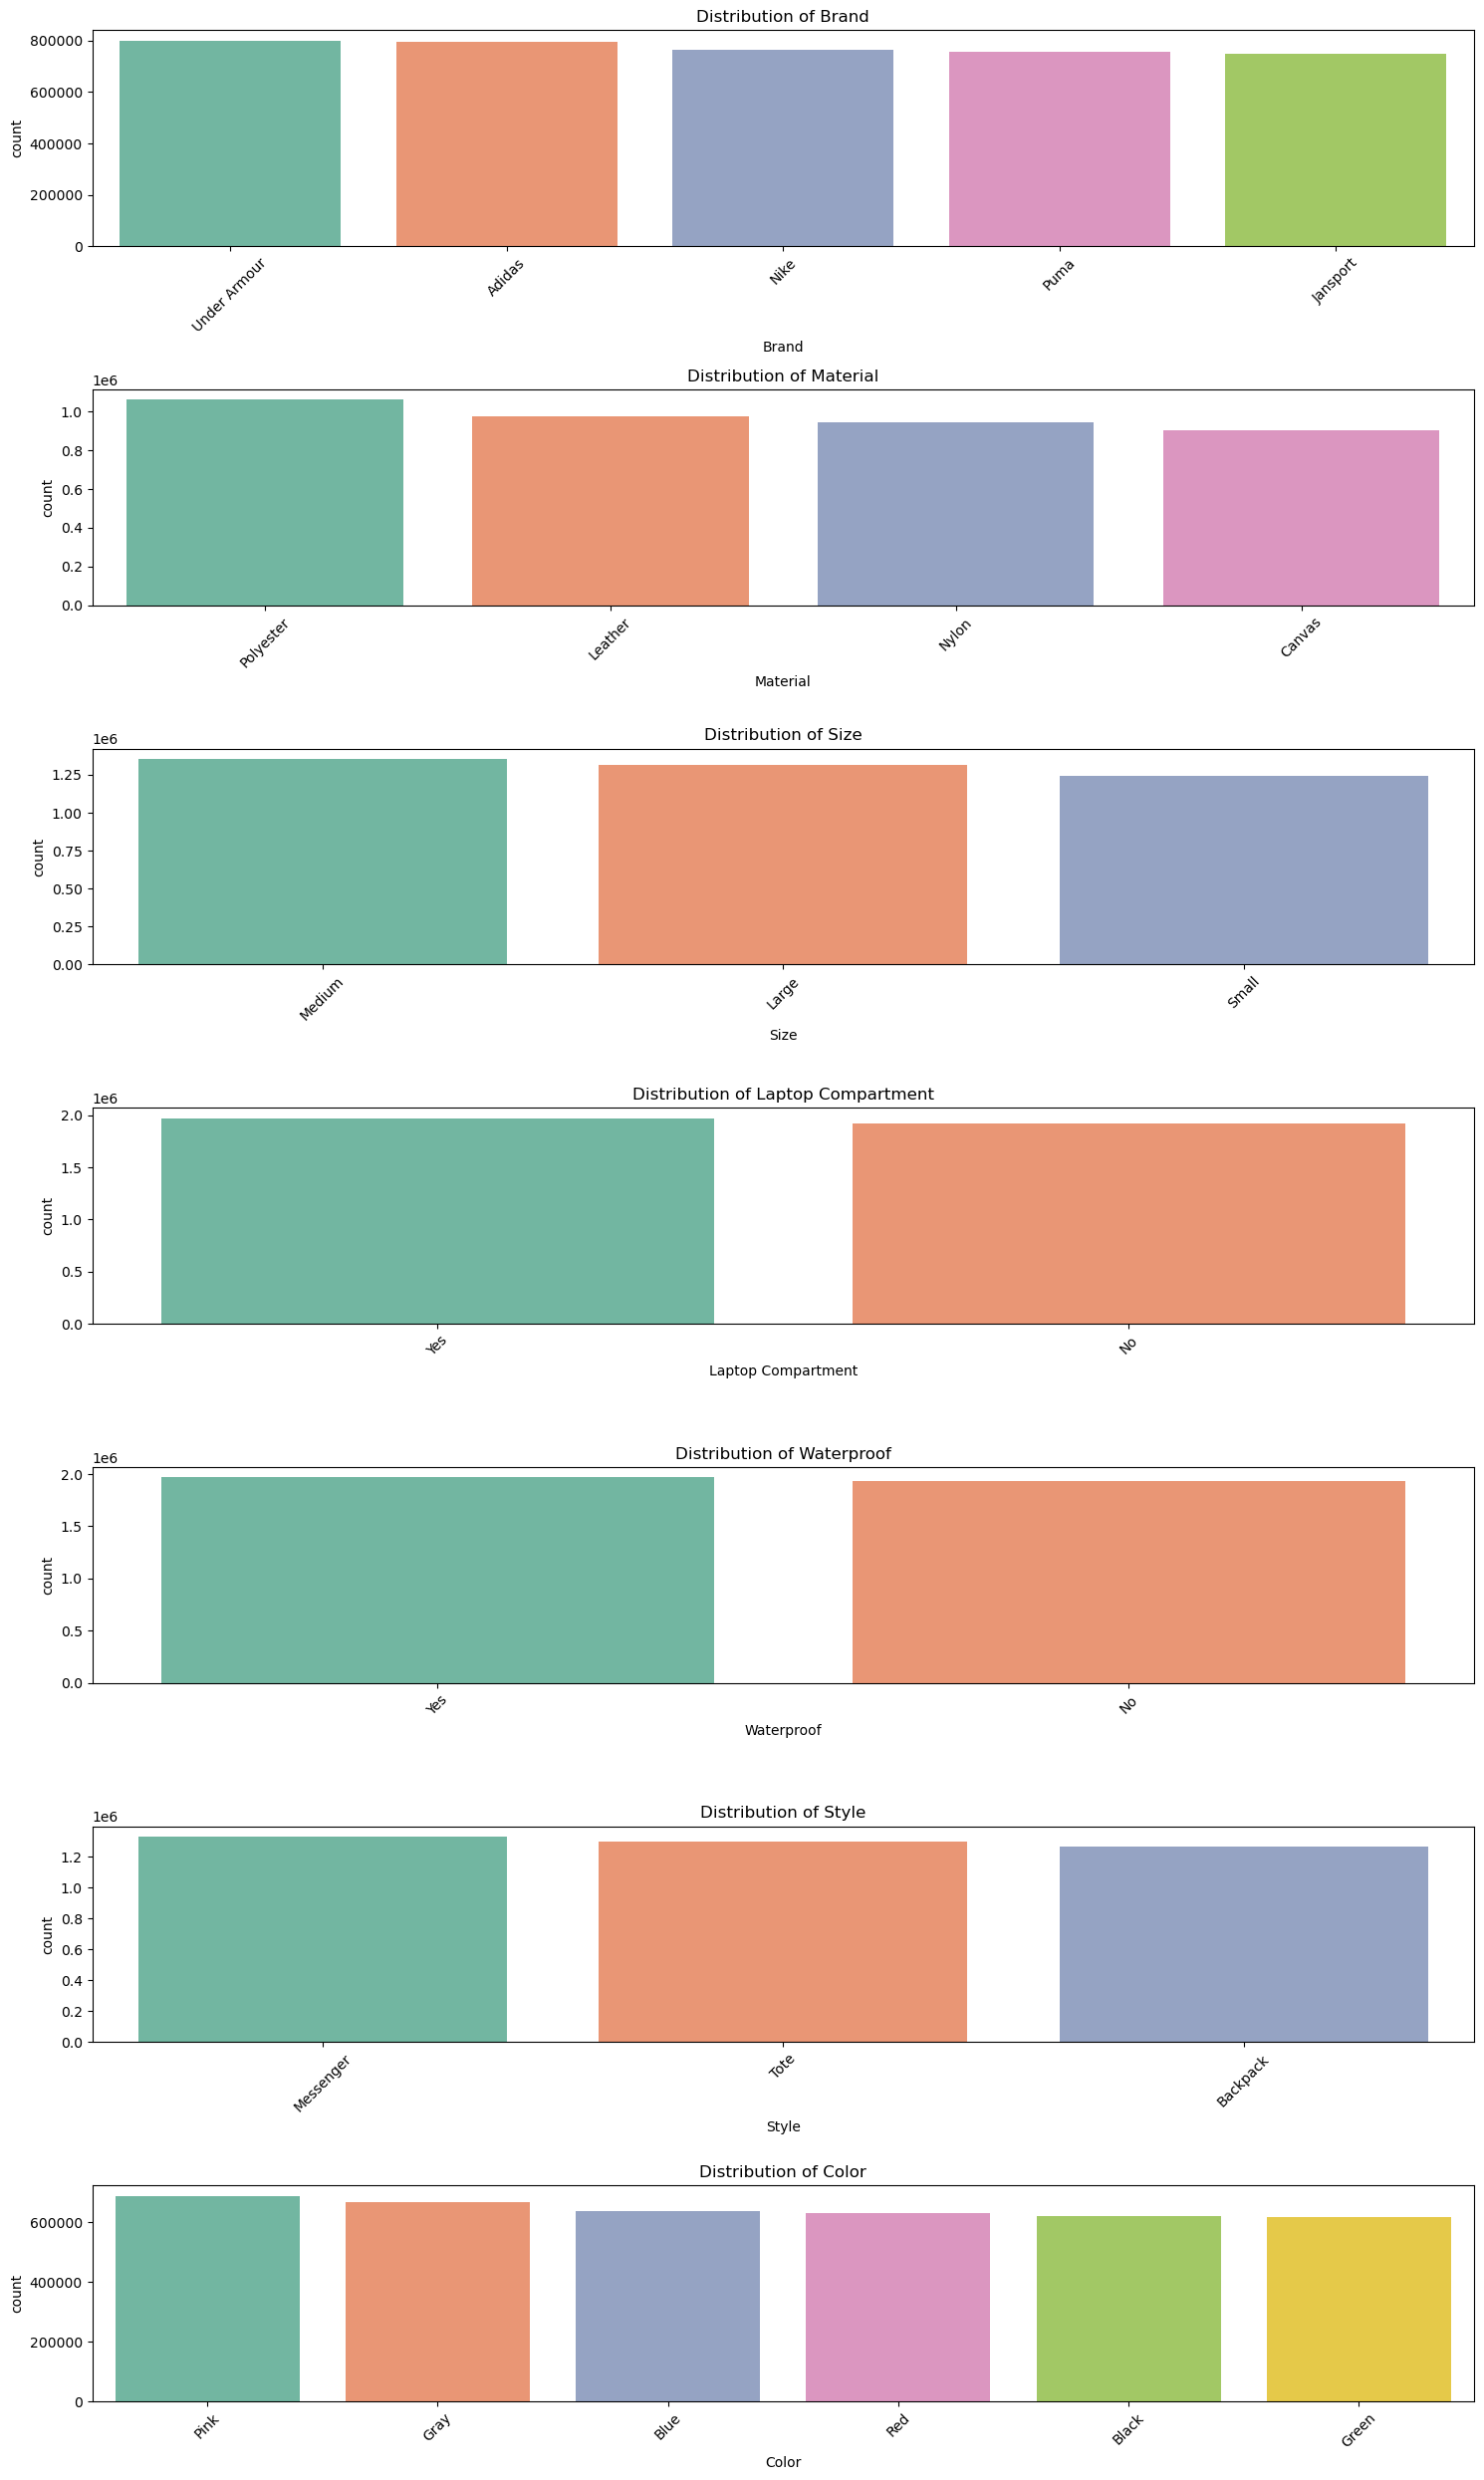

In [8]:
#Univariate analysis of categorical variables

categorical_cols = ["Brand", "Material","Size","Laptop Compartment", "Waterproof","Style","Color"]

plt.figure(figsize=(15,25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=train, x=col, order=train[col].value_counts().index, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

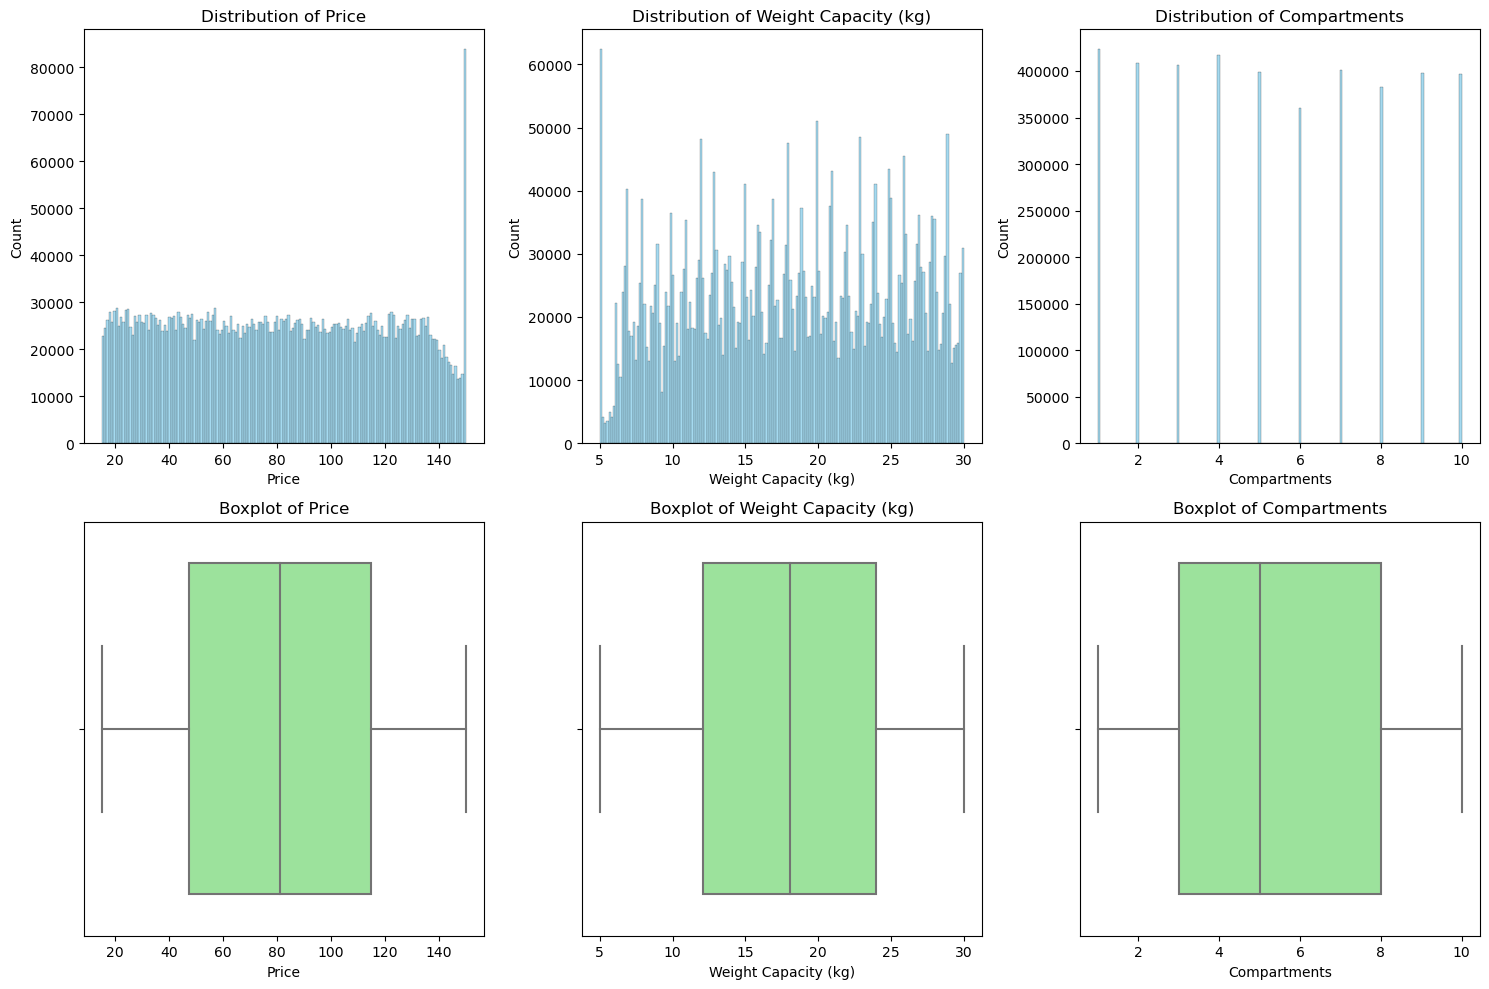

In [9]:
#univariate analysis of numerical cols
numerical_cols = ["Price","Weight Capacity (kg)","Compartments"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, len(numerical_cols), i)
    sns.histplot(train[col], kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    
    plt.subplot(2, len(numerical_cols), i+len(numerical_cols))
    sns.boxplot(x=train[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

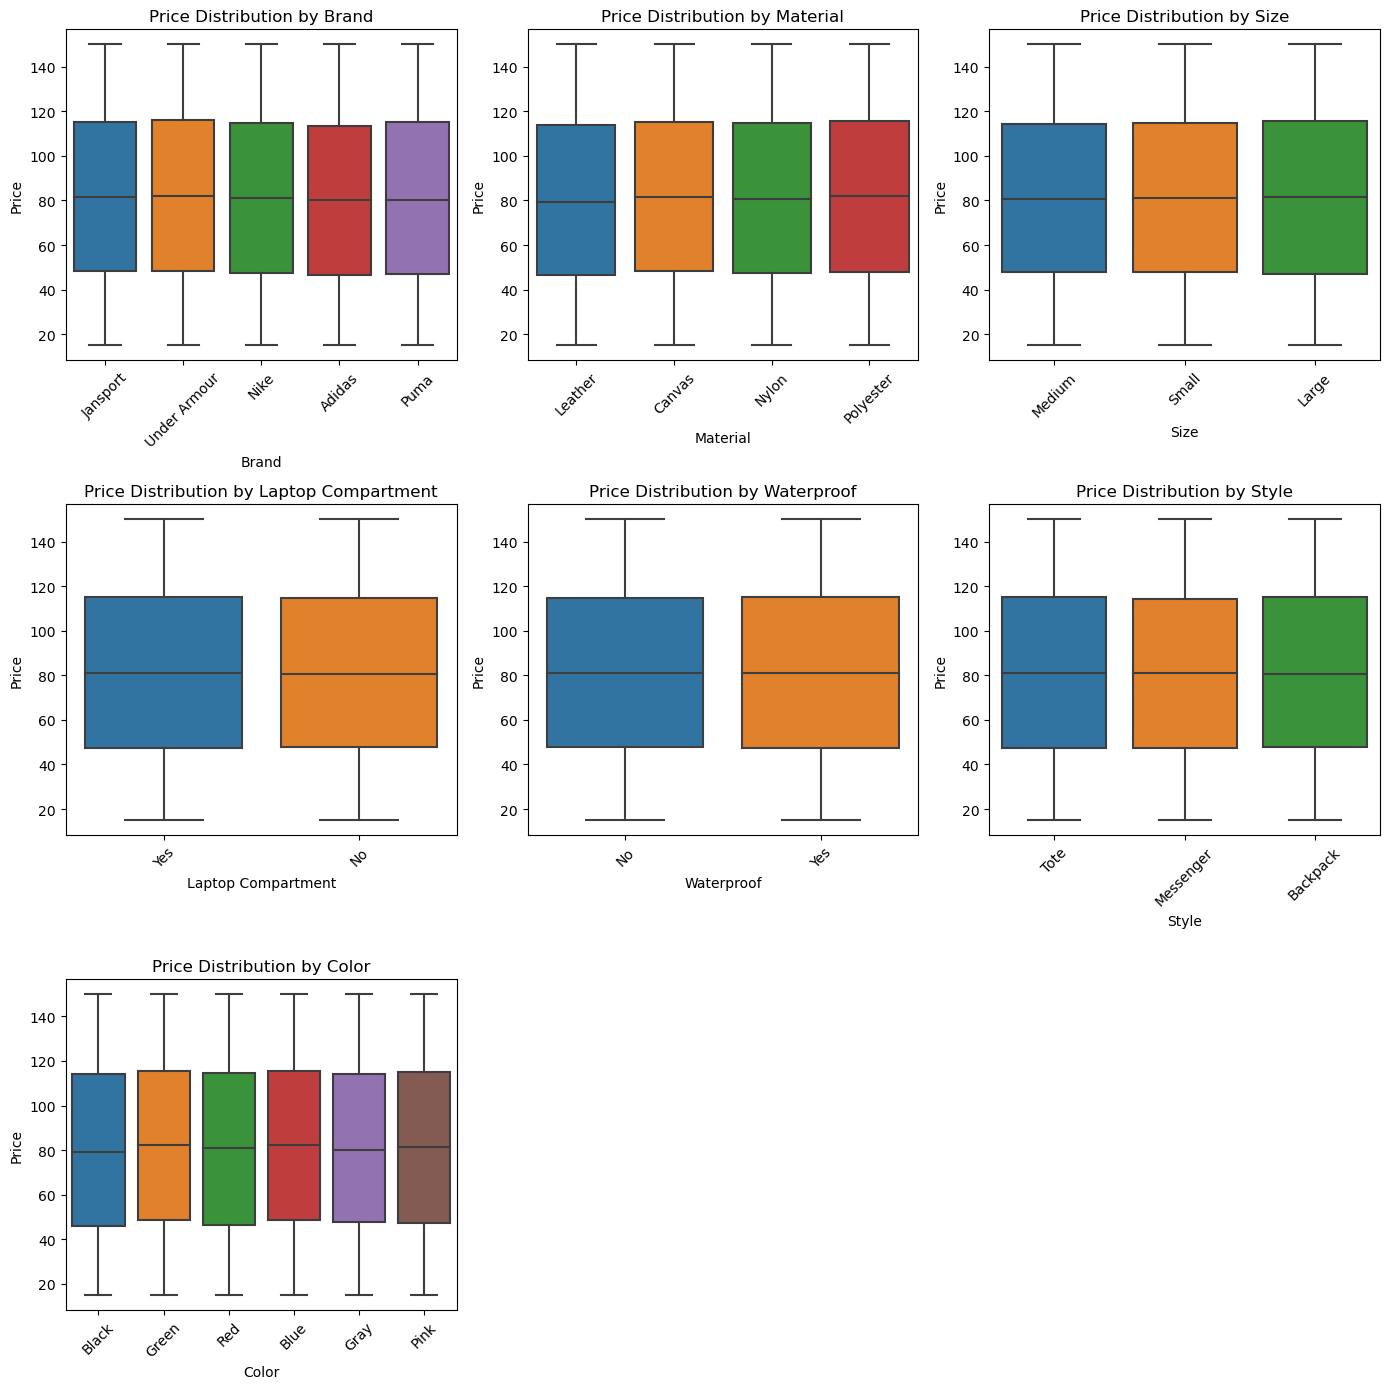

In [13]:
# box plot of categorical variables

plt.figure(figsize = [14,14])
for i , col in enumerate(categorical_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=col,y="Price", data = train)
    plt.title(f"Price Distribution by {col}")
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Model Training

In [10]:
train.head(5)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [11]:
#removing the id field
train.drop(columns = ["id"], inplace = True)

In [12]:
#copying the test ids for later use
test_ids = test["id"].copy()

In [13]:
#remove the ids from the test df
test.drop(columns = ["id"], inplace = True)

In [14]:
test.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [15]:
#checking the missing values in test
test.isnull().sum()

Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [16]:
test.shape

(200000, 9)

In [18]:
#Feature Engineering
def feature_engineering(df):
    #numerical encoding of categorical variables
    size_mapping = {"Small":1,"Medium":2,"Large":3}
    df["Size_num"] = df["Size"].map(size_mapping)
    df["Compartments_per_size"] = df["Compartments"]/df["Size_num"]
    df["Weight_per_compartment"] = df["Weight Capacity (kg)"]/df["Compartments"]
    df["Waterproof"] = df["Waterproof"].map({"Yes":1,"No":0})
    df["Laptop Compartment"] = df["Laptop Compartment"].map({"Yes":1,"No":0})
    #interaction variable of laptop compartment and waterproof
    df["Is_Waterproof_Laptop"] = df["Waterproof"] * df["Laptop Compartment"]
    #feature engineering for materials
    df["Is_made_of_durable_material"] = df["Material"].apply(lambda x: 1 if x in ["Leather","Polyester"] else 0)
    df["Is_made_of_lightweight_material"] = df["Material"].apply(lambda x:1 if x in ["Canvas","Nylon"] else 0)
    df["Is_made_of_luxury_material"] = df["Material"].apply(lambda x:1 if x == "Leather" else 0)
    df["Is_Professional_style"] = df["Style"].apply(lambda x:1 if x in["Messenger","Tote"] else 0)
    df["Is_Casual_style"]= df["Style"].apply(lambda x:1 if x == "Backpack" else 0)
    df["Is_Premium_Brand"] = df["Brand"].apply(lambda x:1 if x in["Nike","Adidas","Under Armour"] else 0)
    df["Is_affordable_brand"] = df["Brand"].apply(lambda x:1 if x == "Jansport" else 0)
    df["Is_small"] = df["Size"].apply(lambda x:1 if x== "Small" else 0)
    df["Is_medium"] = df["Size"].apply(lambda x:1 if x== "Medium" else 0)
    df["Is_large"] = df["Size"].apply(lambda x:1 if x== "Large" else 0)
    
    return df

train = feature_engineering(train)
test = feature_engineering(test)
    


In [19]:
train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,...,Is_made_of_durable_material,Is_made_of_lightweight_material,Is_made_of_luxury_material,Is_Professional_style,Is_Casual_style,Is_Premium_Brand,Is_affordable_brand,Is_small,Is_medium,Is_large
0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875,...,1,0,1,1,0,0,1,0,1,0
1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056,...,0,1,0,1,0,0,1,1,0,0
2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320,...,1,0,1,1,0,1,0,1,0,0
3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793,...,0,1,0,1,0,1,0,1,0,0
4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312,...,0,1,0,1,0,1,0,0,1,0


In [21]:
#filling missing values
category_var = ["Brand","Material","Size","Laptop Compartment", "Waterproof","Compartments","Style","Color"]

train[category_var] = train[category_var].fillna("None").astype("string").astype('category')
median_weight = train["Weight Capacity (kg)"].median()
train["Weight Capacity (kg) categorical"] = train["Weight Capacity (kg)"].fillna(median_weight).astype('string')
train["Weight Capacity (kg)"] = train["Weight Capacity (kg)"].fillna(median_weight).astype('float64')

test[category_var] = test[category_var].fillna("None").astype("string").astype("category")
test["Weight Capacity (kg) categorical"] =train["Weight Capacity (kg) categorical"].fillna(median_weight).astype("string")
test["Weight Capacity (kg)"] = test["Weight Capacity (kg)"].fillna(median_weight).astype("float64")



In [22]:
train.dtypes

Brand                                     category
Material                                  category
Size                                      category
Compartments                              category
Laptop Compartment                        category
Waterproof                                category
Style                                     category
Color                                     category
Weight Capacity (kg)                       float64
Price                                      float64
Size_num                                   float64
Compartments_per_size                      float64
Weight_per_compartment                     float64
Is_Waterproof_Laptop                       float64
Is_made_of_durable_material                  int64
Is_made_of_lightweight_material              int64
Is_made_of_luxury_material                   int64
Is_Professional_style                        int64
Is_Casual_style                              int64
Is_Premium_Brand               

In [23]:
#assign price to a y variable and remove it from the training dataframe
y =train["Price"]
train = train.drop(["Price"],axis=1)

X= train
X_test = test

In [24]:
#checking the standard deviation and variance of the price variable
print("Variance is :",y.var())
print("Standard Deviation is :", y.std())

Variance is : 1516.2211200488912
Standard Deviation is : 38.93868410782382


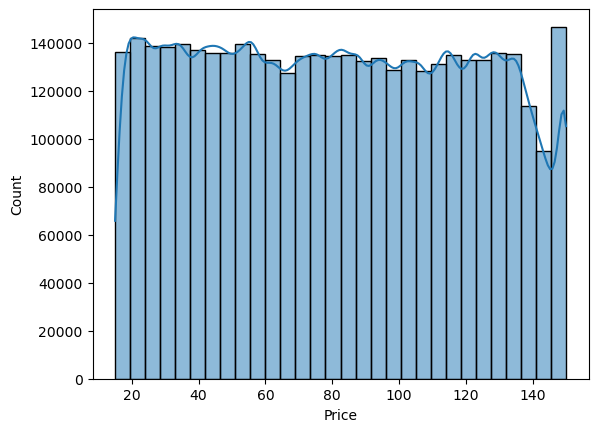

In [27]:
sns.histplot(y, bins = 30, kde = "true")
plt.title("")
plt.show()

In [28]:
#our backpack prices are highly dispered. that means the prices are varied and includes both premium and budegt friendluy backpacks
#checking the skewness

from scipy.stats import skew
print("Skewness for price is : ", y.skew())

#because our skewness is less than 0.5 we don't need to do log transformation

Skewness for price is :  0.03695777580374125


In [ ]:
# we are going to use xgboost
from xgboost 